In [76]:
import numpy as np
import pandas as pd
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
hd=pd.read_csv('heart_diseases.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
hd.groupby("target").count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


### How many people are suffering from Heart Disease?

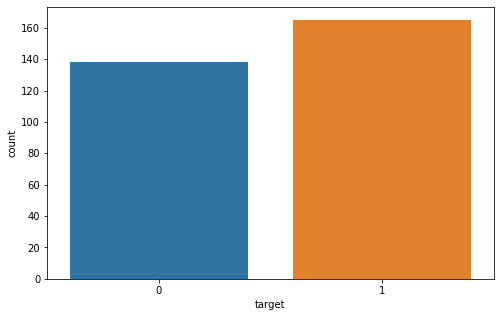

In [7]:
fig,ax=plt.subplots(figsize = (8,5))
sns.countplot(data=hd, x='target')
plt.show()

From above graph we can say that more than half of the population suffering from Heart Disease.


### Feature Analaysis

#### Sex(Category)

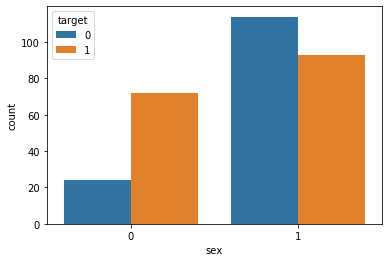

In [8]:
sns.countplot(x='sex',data=hd,hue='target')
plt.show()

Out of 96 females - 72 have heart disease and 24 do not have heart disease.

Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

#### Fasting Blood Sugar (fbs)(Category)

In [9]:
hd.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

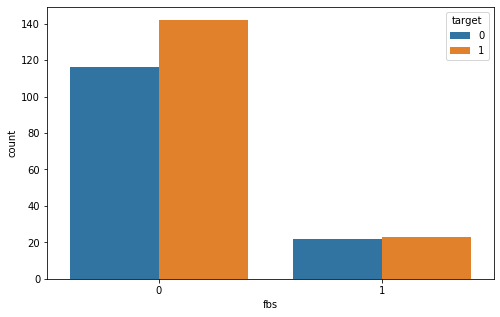

In [10]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(x='fbs',data=hd,hue='target')
plt.show()

This is weird People having fps < 120 have more chance of having Heart Disease than people havnig fps >120

#### Chest pain(cp)(Category)

In [11]:
hd.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

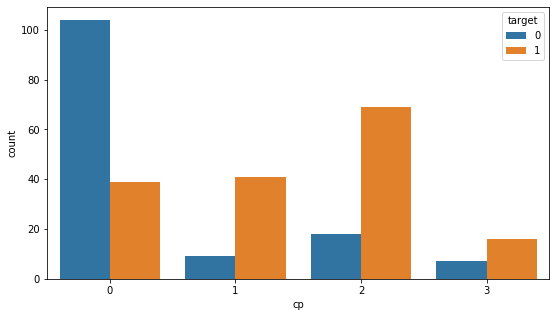

In [12]:
fig,ax=plt.subplots(figsize=(9,5))
sns.countplot(x='cp',data=hd,hue='target')
plt.show()

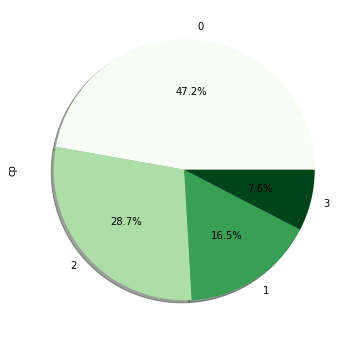

In [13]:
fig,ax=plt.subplots(figsize=(10,6))
hd.cp.value_counts().plot.pie(autopct='%1.1f%%',shadow=True, cmap='Greens')
plt.show()

#### Correlation between different features

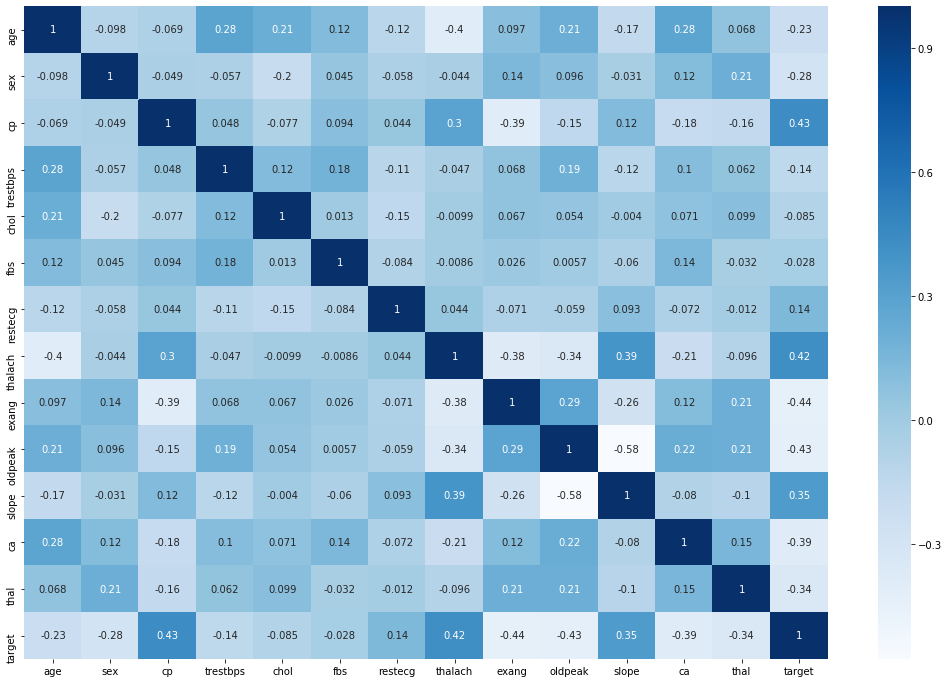

In [14]:
fig=plt.figure(figsize=(18,12))
sns.heatmap(hd.corr(), annot= True, cmap='Blues')
plt.show()

In [15]:
#sns.pairplot(data=hd,kind='scatter',diag_kind='hist')

#### Predictive model

In [16]:
hd['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### splitting data into train and test 

In [17]:
x=hd.drop('target',axis=1)
y=hd['target']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

#### Normalisation by standard scalar

In [19]:
from sklearn.preprocessing import StandardScaler

#### Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

##### Accuracy score:

In [21]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8131868131868132

In [22]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### confusion Matrix

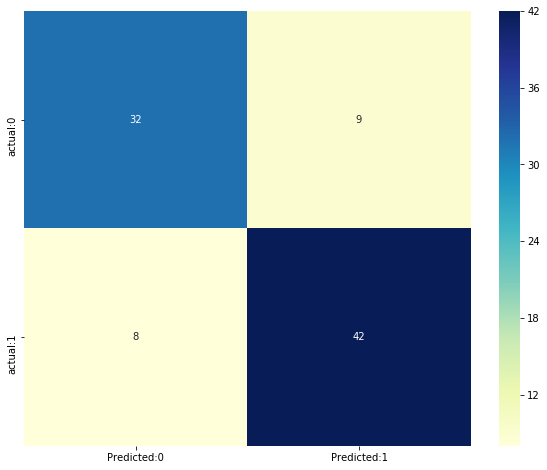

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier

#### k-nearest neighbor with grid search

In [26]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
gs=GridSearchCV(knn,param,cv=3,scoring='roc_auc')
gs.fit(x_scaled,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispat

In [27]:
gs.best_params_

{'n_neighbors': 41, 'weights': 'uniform'}

In [28]:
knn=KNeighborsClassifier(n_neighbors=41,weights='uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=41, p=2,
                     weights='uniform')

In [29]:
y_predknn=knn.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predknn)

Accuracy score:


0.6703296703296703

In [30]:
print('Classification Report')
print(classification_report(y_test, y_predknn))

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.49      0.57        41
           1       0.66      0.82      0.73        50

    accuracy                           0.67        91
   macro avg       0.68      0.65      0.65        91
weighted avg       0.67      0.67      0.66        91



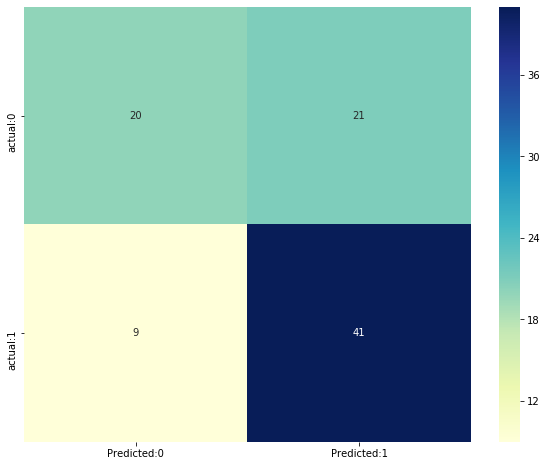

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predknn)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Decision Tree 

In [32]:
DT=DecisionTreeClassifier(criterion='gini',random_state=42)
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [33]:
y_predDT=DT.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predDT)

Accuracy score:


0.7362637362637363

In [34]:
print('Classification Report')
print(classification_report(y_test, y_predDT))

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



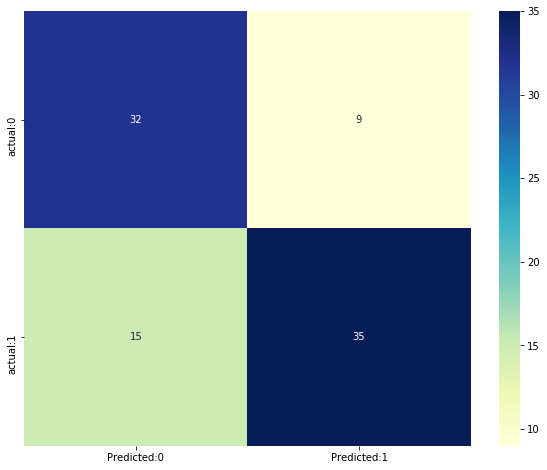

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predDT)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Random forest 

In [36]:
RF=RandomForestClassifier(n_estimators=8,random_state=42)
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
y_predRF=RF.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predRF)

Accuracy score:


0.8241758241758241

In [38]:
print('Classification Report')
print(classification_report(y_test, y_predRF))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



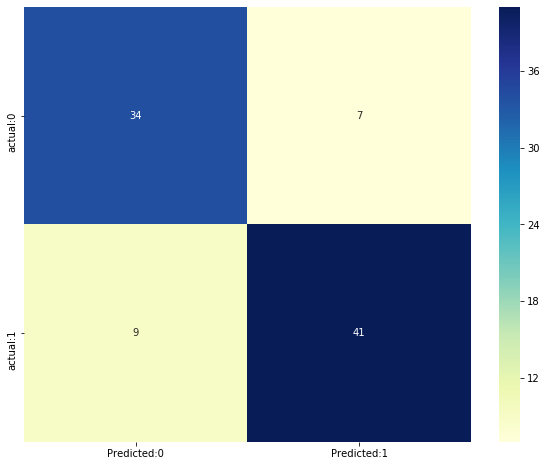

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predRF)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Gaussian naive bayes

In [40]:
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_predNB=NB.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predNB)

Accuracy score:


0.8351648351648352

In [42]:
print('Classification Report')
print(classification_report(y_test, y_predNB))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



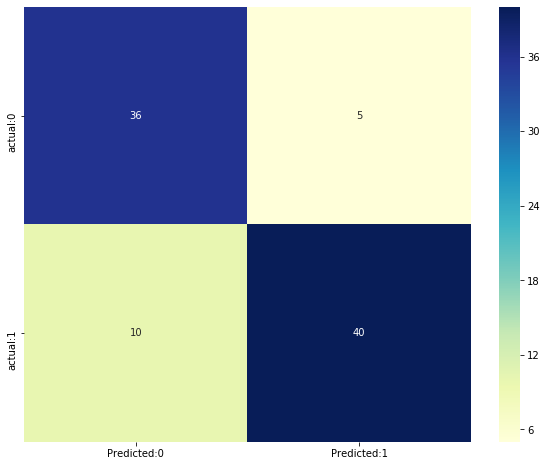

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predNB)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### DecisionTreeClassifier

In [44]:
DT_reg=DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=42)
DT_reg.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [45]:
y_predDT_reg=DT_reg.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predDT_reg)

Accuracy score:


0.7362637362637363

In [46]:
print('Classification Report')
print(classification_report(y_test, y_predDT_reg))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.77      0.74      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



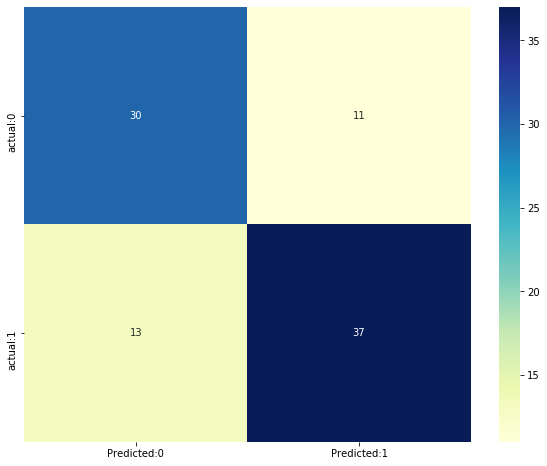

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predDT_reg)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Bagging technique

#### k-nearest neighbor with Bagging technique

In [48]:
from sklearn.ensemble import BaggingClassifier
knn_bag=BaggingClassifier(base_estimator=knn,n_estimators=5,random_state=42)
knn_bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=41, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=42, verbose=0, warm_start=False)

In [49]:
y_predknn_bag=knn_bag.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predknn_bag)

Accuracy score:


0.6813186813186813

In [50]:
print('Classification Report')
print(classification_report(y_test, y_predknn_bag))

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.59      0.62        41
           1       0.69      0.76      0.72        50

    accuracy                           0.68        91
   macro avg       0.68      0.67      0.67        91
weighted avg       0.68      0.68      0.68        91



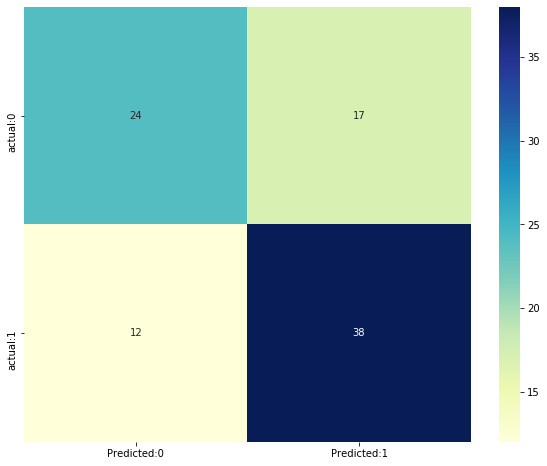

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predknn_bag)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Logistic Regression with Bagging technique

In [52]:
LR_bag=BaggingClassifier(base_estimator=logreg,n_estimators=10,random_state=42)
LR_bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=42, ve

In [53]:
y_predLR_bag=LR_bag.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predLR_bag)

Accuracy score:


0.8131868131868132

In [54]:
print('Classification Report')
print(classification_report(y_test, y_predLR_bag))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



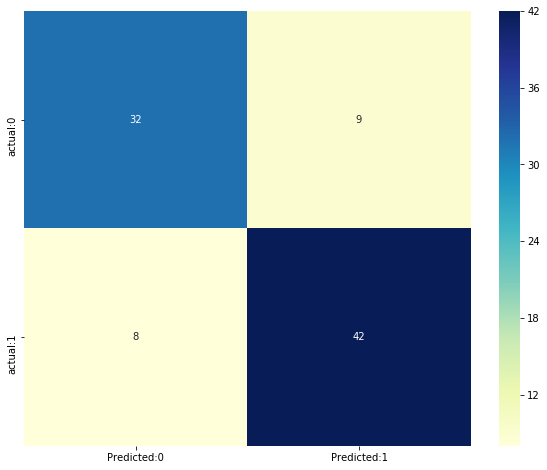

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predLR_bag)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Decision Tree with bagging techinque

In [62]:
from sklearn.ensemble import BaggingClassifier
DT_bag=BaggingClassifier(base_estimator=DT,n_estimators=5,random_state=42)
DT_bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [63]:
y_predDT_bag=DT_bag.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predDT_bag)

Accuracy score:


0.7802197802197802

In [64]:
print('Classification Report')
print(classification_report(y_test, y_predDT_bag))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.74      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



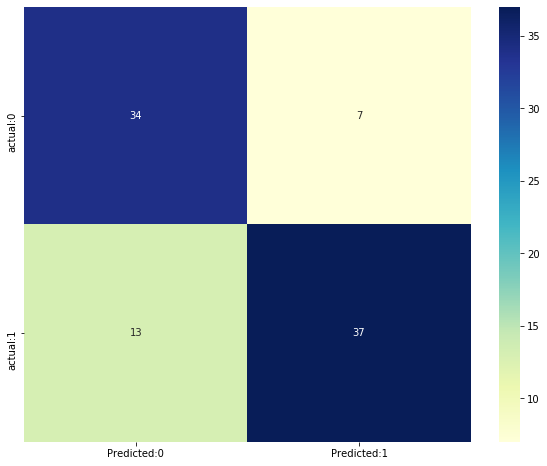

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predDT_bag)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Random Forest with bagging techinque

In [66]:
from sklearn.ensemble import BaggingClassifier
RF_bag=BaggingClassifier(base_estimator=RF,n_estimators=5,random_state=42)
RF_bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=8,
                                                        n_jobs=None,
         

In [67]:
y_predRF_bag=RF_bag.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predRF_bag)

Accuracy score:


0.8351648351648352

In [68]:
print('Classification Report')
print(classification_report(y_test, y_predRF_bag))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



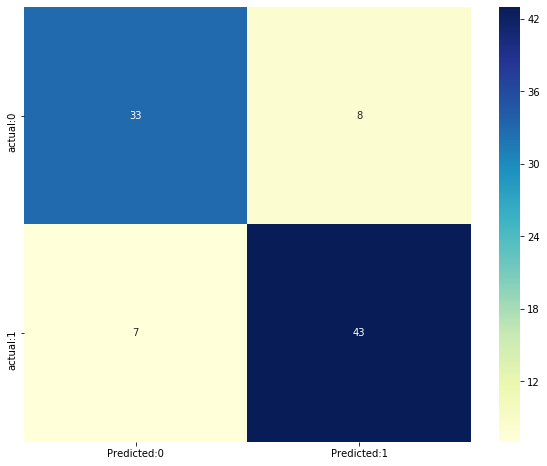

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predRF_bag)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Decision Tree classifier with bagging techinque

In [71]:
DT_reg_bag=BaggingClassifier(base_estimator=DT_reg,n_estimators=10,random_state=42)
DT_reg_bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [72]:
y_predDT_reg_bag=NB_bag.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predDT_reg_bag)

Accuracy score:


0.8461538461538461

In [73]:
print('Classification Report')
print(classification_report(y_test, y_predDT_reg_bag))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



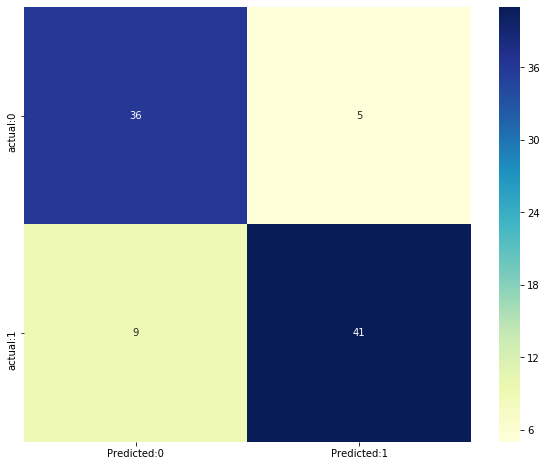

In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predDT_reg_bag)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#### Gaussion Naive Bayes with Bagging technique

In [56]:
NB_bag=BaggingClassifier(base_estimator=NB,n_estimators=10,random_state=42)
NB_bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [57]:
y_predNB_bag=NB_bag.predict(x_test)
print('Accuracy score:')
sklearn.metrics.accuracy_score(y_test,y_predNB_bag)

Accuracy score:


0.8461538461538461

In [58]:
print('Classification Report')
print(classification_report(y_test, y_predNB_bag))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



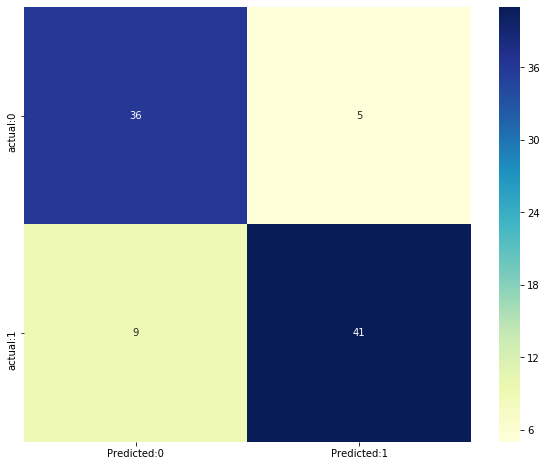

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predNB_bag)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['actual:0','actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [75]:
best_accuracy = pd.DataFrame(np.array([['Logistic Regression',0.81,0.81],['KNN',0.67,0.68],['Decission Tree',0.73,0.78],['Random Forest',0.82,0.83],['NB',0.83,0.84],['DT_reg',0.73,0.84]]),columns=['Model Name','Accuracy Without Bagging','Accuracy With Bagging'])
best_accuracy

,Model Name,Accuracy Without Bagging,Accuracy With Bagging
0,Logistic Regression,0.81,0.81
1,KNN,0.67,0.68
2,Decission Tree,0.73,0.78
3,Random Forest,0.82,0.83
4,NB,0.83,0.84
5,DT_reg,0.73,0.84
